In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [173]:
# Project 1: Data Manipulation, Handling Missing Data, Data Visualization
# Step 1: Load the dataset

# data_url = "data/titanic.csv"
# df = pd.read_csv(data_url)

df = pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")
# df

In [174]:
# Step 2: Find features with null values
null_columns = df.columns[df.isnull().any()].tolist()
print("Columns with Null Values:", null_columns)

Columns with Null Values: ['Age', 'Cabin', 'Embarked']


In [176]:
# Step 3: Fill null values in 'Age' with mean and 'Cabin' with 'Unknown'
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4816\4064791586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


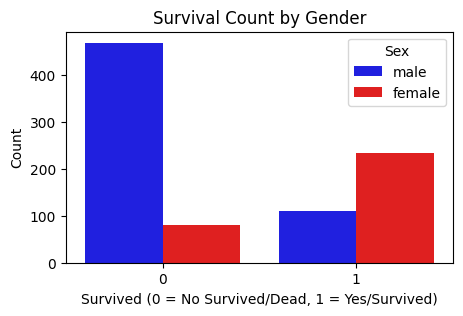

In [177]:
# Step 4: Plot Survived vs Dead including Male and Female counts
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Survived', hue='Sex', palette={'male':'blue', 'female':'red'})
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No Survived/Dead, 1 = Yes/Survived)')
plt.ylabel('Count')
plt.show()

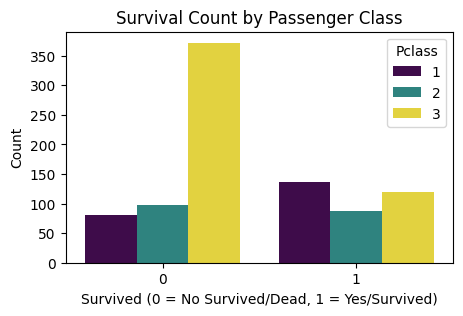

In [178]:
# Step 5: Plot Survived vs Dead by Pclass
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Survived', hue='Pclass', palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No Survived/Dead, 1 = Yes/Survived)')
plt.ylabel('Count')
plt.show()

In [179]:
# Step 6: Create AgeClass column
def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(age_class)


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,2


In [180]:
# Step 7: Drop Age column
df.drop(columns=['Age'], inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2


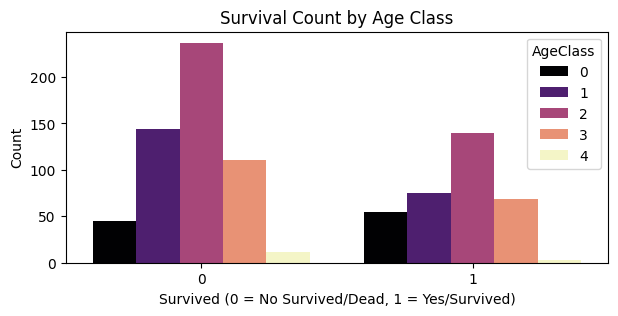

In [181]:
# Step 8: Plot Survived vs Dead based on AgeClass
plt.figure(figsize=(7, 3))
sns.countplot(data=df, x='Survived', hue='AgeClass', palette='magma')
plt.title('Survival Count by Age Class')
plt.xlabel('Survived (0 = No Survived/Dead, 1 = Yes/Survived)')
plt.ylabel('Count')
plt.show()

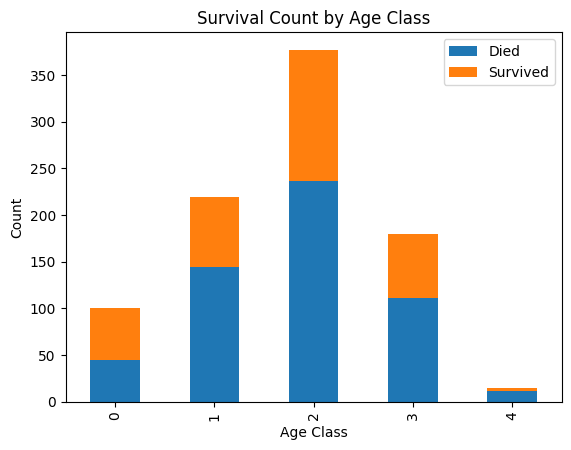

In [182]:
# Step Or 8: Plot Survived vs Dead based on AgeClass
grouped = df.groupby(['AgeClass', 'Survived']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title("Survival Count by Age Class")
plt.xlabel("Age Class")
plt.ylabel("Count")
plt.legend(["Died", "Survived"])
plt.show()

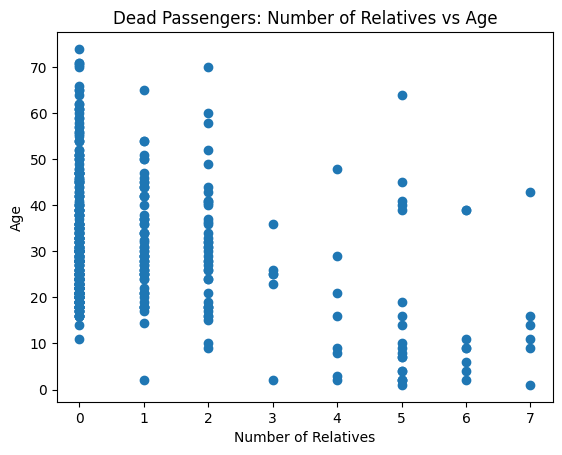

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Number of Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [202]:
# Assignments for me
# Task 5: Scatter plot of Dead Passengers with Number of Relatives and Age


# Step 1: Load the Titanic dataset
url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)

# Step 2: Create the 'Number of Relatives' column
df['Number of Relatives'] = df['SibSp'] + df['Parch']

# Step 3: Filter the dataset for dead passengers (Survived == 0)
dead_passengers = df[df['Survived'] == 0]

# Step 4: Create the scatter plot
plt.scatter(dead_passengers['Number of Relatives'], dead_passengers['Age'])
plt.xlabel('Number of Relatives')
plt.ylabel('Age')
plt.title('Dead Passengers: Number of Relatives vs Age')
plt.show()

df.head()

In [203]:
# Drop Number of Relatives column
df.drop(columns=['Number of Relatives'], inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
# Project 2: Dataset Merging, Data Manipulation, K-Means Clustering

# Step 1: Create 'term-test-1-result.csv'
np.random.seed(42)
data1 = {
    'Registration Number': [f'R{i:03d}' for i in range(1, 51)],
    'Name': [f'Student {i}' for i in range(1, 51)],
    'TT-1 Marks': np.random.randint(5, 21, size=50)  # Marks out of 20
}
df1 = pd.DataFrame(data1)
df1.to_csv('term-test-1-result.csv', index=False)


In [206]:
# Step 2: Create 'term-test-2-result.csv'
data2 = {
    'Registration Number': [f'R{i:03d}' for i in range(1, 51)],
    'Name': [f'Student {i}' for i in range(1, 51)],
    'TT-2 Marks': np.random.randint(5, 21, size=50)  # Different random marks
}
df2 = pd.DataFrame(data2)
df2.to_csv('term-test-2-result.csv', index=False)

In [207]:
# Step 3: Load the datasets and merge
df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')
merged_df = pd.merge(df1, df2, on=['Registration Number', 'Name'])

merged_df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks
0,R001,Student 1,11,19
1,R002,Student 2,8,18
2,R003,Student 3,17,7
3,R004,Student 4,19,16
4,R005,Student 5,15,11


In [208]:
# Step 4: Create new columns
merged_df['Best TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

merged_df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks,Best TT Marks,Average TT Marks
0,R001,Student 1,11,19,19,15.0
1,R002,Student 2,8,18,18,13.0
2,R003,Student 3,17,7,17,12.0
3,R004,Student 4,19,16,19,17.5
4,R005,Student 5,15,11,15,13.0


In [ ]:
# Step 5: Drop TT-1 and TT-2 Marks columns
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)  # Drop columns

merged_df.head()

,Registration Number,Name,Best TT Marks,Average TT Marks
0,R001,Student 1,19,15.0
1,R002,Student 2,18,13.0
2,R003,Student 3,17,12.0
3,R004,Student 4,19,17.5
4,R005,Student 5,15,13.0


In [210]:
# Step 6: Create and load attendance and term final marks data
attendance_final_data = {
    'Registration Number': [f'R{i:03d}' for i in range(1, 51)],
    'Attendance Marks': np.random.randint(5, 11, size=50),  # Out of 10
    'Term Final Marks': np.random.randint(50, 101, size=50)  # Out of 100
}
attendance_df = pd.DataFrame(attendance_final_data)
attendance_df.to_csv('attendance-final.csv', index=False)

# Load attendance and term final marks CSV
attendance_df = pd.read_csv('attendance-final.csv')

# Merge with term test data
final_df = pd.merge(merged_df, attendance_df, on='Registration Number')

# Create Final Marks column
final_df['Final Marks'] = final_df['Term Final Marks'] * 0.7 + final_df['Average TT Marks'] + final_df['Attendance Marks']


final_df.head()

,Registration Number,Name,Best TT Marks,Average TT Marks,Attendance Marks,Term Final Marks,Final Marks
0,R001,Student 1,19,15.0,6,89,83.3
1,R002,Student 2,18,13.0,6,71,68.7
2,R003,Student 3,17,12.0,8,76,73.2
3,R004,Student 4,19,17.5,6,84,82.3
4,R005,Student 5,15,13.0,6,50,54.0


In [211]:
# Step 7: Save final results to CSV
final_df.to_csv('final-result.csv', index=False)

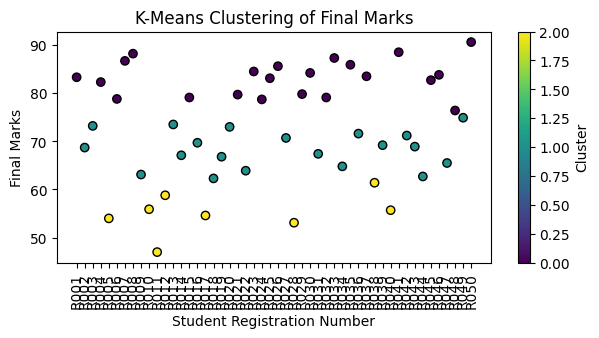

In [212]:
# Step 8: K-Means Clustering
X = final_df[['Final Marks']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_df['Cluster'] = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(7, 3))
plt.scatter(final_df['Registration Number'], final_df['Final Marks'], c=final_df['Cluster'], cmap='viridis', edgecolors='k')
plt.colorbar(label='Cluster')
plt.xlabel('Student Registration Number')
plt.ylabel('Final Marks')
plt.title('K-Means Clustering of Final Marks')
plt.xticks(range(0, len(final_df), 1), rotation=90)
plt.show()